In [1]:
from __future__ import print_function

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dell\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [6]:
dataset=pd.read_csv("sonar.csv")
dataset

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


## Aim is to predict weather the sonar signal bounced back from a metal cylinder (M) or a rough cylindrical rock (R)

#### splitting the dataset into independent and dependent variables

In [8]:
X=dataset.iloc[:,0:60].values
Y=dataset.iloc[:,60].values

#### Encoding the prediction columns as 0 or 1

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)


#### Splitting data into training and testing set

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,shuffle=True,random_state=2)


#### Feature scaling (normalising the independent variables between 0 and 1)

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

#### Applying ANN to find the best values of the hyperparameter

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_classifier():
    classifier=Sequential()
    
    #putting the input layer and the first hidden layer
    classifier.add(Dense(units=32,activation='relu',kernel_initializer='uniform',input_dim=60))
    #classifier.add(Dropout(rate=0.1))
    
    #putting the second hidden layer
    classifier.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
    
     #putting the third hidden layer
    classifier.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
    
    #putting the output layer
    classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
    
    #compiling the classifier
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return classifier

classifier=KerasClassifier(build_fn = build_classifier)
parameters={'batch_size':[10,20,30],'epochs':[4,5,10]}

#implementing GridSearchCV
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=5,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

best_parameters=grid_search.best_params_

C:\Users\Dell\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/4
155/155 [==============================] - 3s 18ms/step - loss: 0.6919 - accuracy: 0.6387
Epoch 2/4
155/155 [==============================] - 0s 534us/step - loss: 0.6739 - accuracy: 0.7677
Epoch 3/4
155/155 [==============================] - 0s 360us/step - loss: 0.5807 - accuracy: 0.7806
Epoch 4/4
155/155 [==============================] - 0s 668us/step - loss: 0.4114 - accuracy: 0.8258


In [82]:
best_parameters

{'batch_size': 10, 'epochs': 4}

In [84]:
classifier=Sequential()
classifier.add(Dense(units=32,activation='relu',kernel_initializer='uniform',input_dim=60))
classifier.add(Dense(units=64,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(units=128,activation='relu',kernel_initializer='uniform'))
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history=classifier.fit(x_train,y_train,epochs=4,batch_size=10,validation_data=(x_test,y_test))

Train on 155 samples, validate on 52 samples
Epoch 1/4
155/155 [==============================] - 2s 10ms/step - loss: 0.6920 - accuracy: 0.5419 - val_loss: 0.6896 - val_accuracy: 0.4808
Epoch 2/4
155/155 [==============================] - 0s 506us/step - loss: 0.6767 - accuracy: 0.6387 - val_loss: 0.6484 - val_accuracy: 0.7115
Epoch 3/4
155/155 [==============================] - 0s 527us/step - loss: 0.5952 - accuracy: 0.7806 - val_loss: 0.5410 - val_accuracy: 0.8077
Epoch 4/4
155/155 [==============================] - 0s 532us/step - loss: 0.4591 - accuracy: 0.8000 - val_loss: 0.4198 - val_accuracy: 0.8077


In [85]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### Plotting the graph and comparing the accuracies

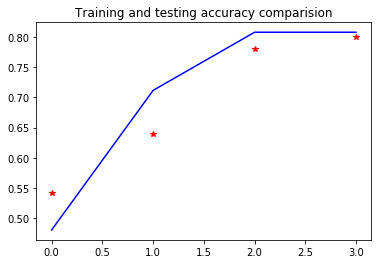

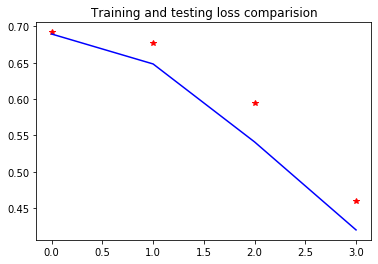

In [86]:
accuracy=history.history['accuracy']           #accuracy of the trained model
val_accuracy=history.history['val_accuracy']   #validation accuracy
loss=history.history['loss']                   #loss in the trained model
val_loss=history.history['val_loss']           #loss during validaton

val_range=range(len(accuracy))

#plotting for accuracy
plt.plot(val_range,accuracy,'r*',label='Training Accuracy')
plt.plot(val_range,val_accuracy,'b',label='Testing Accuracy')
plt.title('Training and testing accuracy comparision')
plt.show()

#plotting for loss
plt.plot(val_range,loss,'r*',label='Training Loss')
plt.plot(val_range,val_loss,'b',label='Testing Loss')
plt.title('Training and testing loss comparision')
plt.show()

#### Prediction on the testing data

In [79]:
pred_y=classifier.predict(x_test)
pred_y=(pred_y>0.5)

In [80]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,pred_y)
con

array([[24,  1],
       [ 8, 19]], dtype=int64)

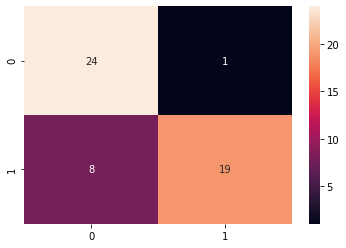

In [87]:
sns.heatmap(con,annot=True)

In [90]:
#accuracy of the model

print("Accuracy Value :" ,round((con[0,0]+con[1,1])/(con[0,0]+con[1,1]+con[1,0]+con[0,1])*100,2))

Accuracy Value : 82.69


## End of Model